-------------
# **Machine Learning for NLP Sentiment Analysis**
-------------

## **Dataset**
------

## **UCI ML Drug Review Dataset**

- A dataset from a patient survey
- Test partition. Patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.
- xxxx

## **Data Dictionary:**
- xxxx

---------
## **Objective**
-------
- Use NLP to do sentiment analysis regarding patient experience with drugs

## **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

### **Importing the Dataset**

In [3]:
train = pd.read_csv('drug_rev_data/drugsComTrain_raw.csv')
test = pd.read_csv('drug_rev_data/drugsComTest_raw.csv')

In [4]:
# Saving the dataset to another variable

train_data = train.copy()
test_data = test.copy()

### **View the first and last 5 rows of the dataset**

In [5]:
train_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


**Observation:**

- 

In [6]:
train_data.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116


------------
### **Observations:**

- Can drop 'uniqueID'
- Change 'drugeName' to 'Drug Name', 'condition' to 'Condition', 'review' to 'Review', 'rating' to 'Rating', 'date' to 'Date'
- What is 'usefulCount'?

-------------

### **Dataset shape**

In [7]:
train_data.shape

(161297, 7)

---------
### **Observations:**
- There are **161,297 rows**
- There are **7 Columns**
---------

### **Identify nulls and datatypes in this dataset**

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


-------
### **Observations:**
- Numerical columns = 'uniqueID', 'rating', 'usefulContent'
- Categorical columns = 'drugName', 'condition', 'review', 'date'
- 'review' is the sentiment and is highly variable patient responses ('review')
- 'date' is a str and NOT a Pandas datetime
-------

### **Identify any missing values in the dataset** ###

In [9]:
train_data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

--------
### **Observations:**
- The 'condition' column has 899 nulls. This is a categorical and can not be averaged or numerically manipulated. Drop these?
--------

-------
### **Check for any duplicates**
--------

In [10]:
# Checking for duplicate values

train_data.duplicated().sum()

0

--------
## **Exploratory Data Analysis**
---------

### **Statistical Summary**

In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,161297.0,115923.585305,67004.445170,2.0,58063.0,115744.0,173776.0,232291.0
rating,161297.0,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


--------
### **Observations:**
- Minimum rating was **1.0** and the max was **10.0**
---------

------
### **Find the count of each unique category in each of the categorical variables**
-------

In [12]:
cat_col = list(train_data.select_dtypes("object").columns)

for column in cat_col:
    print(train_data[column].value_counts())
    print("-" * 50)

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64
--------------------------------------------------
Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                         

**Observations:**
- XXX

----
### **If a column is fully unique, drop it...**
-----

In [13]:
# Column to be dropped is 'uniqueID' in the TRAINING dataset

train_data = train_data.drop(["uniqueID"], axis = 1)

In [14]:
train_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [15]:
# Column to be dropped is 'uniqueID' in the TESTING dataset

test_data = test_data.drop(["uniqueID"], axis = 1)

In [16]:
test_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


----
### **Change date string object to pandas datetime**
------

In [17]:
# Date format change in TRAINING dataset

train_data['date'] = pd.to_datetime(train_data['date'])

In [18]:
train_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [19]:
# Date format change in TESTING dataset

test_data['date'] = pd.to_datetime(test_data['date'])

In [20]:
test_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4


-------
### **Put top 10 conditions in a group**
------

In [21]:
conditions = train_data.condition.value_counts().sort_values(ascending=False)

In [22]:
conditions[:10]

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

----------
## **Univariate Analysis**
----------

### **Create boxplots and histograms to explore and visualize data**

In [23]:
# This method creates a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

---------
### **Choose a numerical column to study**
----------

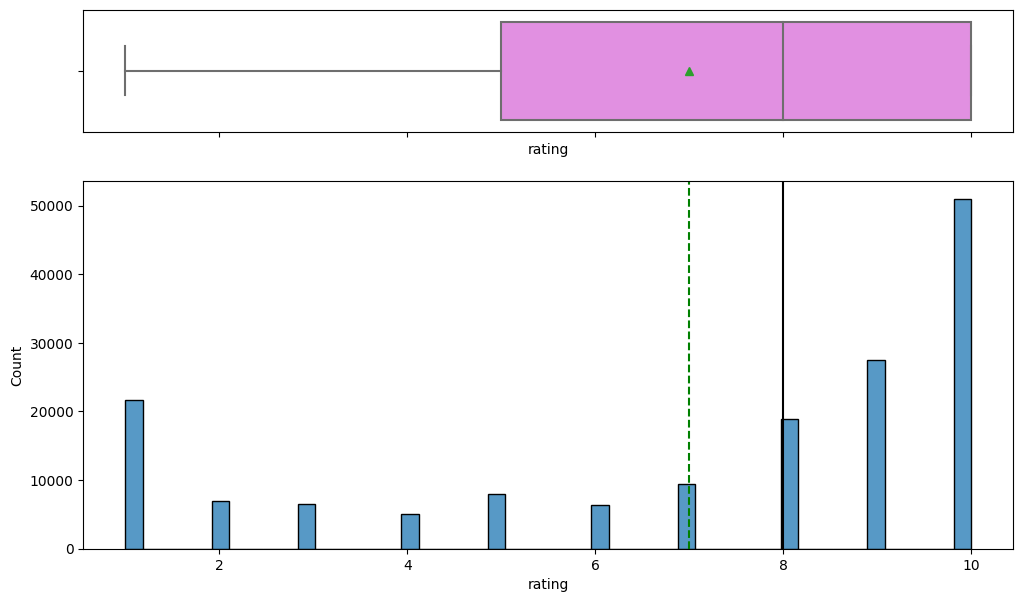

In [24]:
histogram_boxplot(train_data, "rating")

**Observation:**
- XXXXX

-------
## **Visualize the various types under a category type**
_______

In [25]:
# Method to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

------
### **Visualize the distribution of 'ratings'**
------

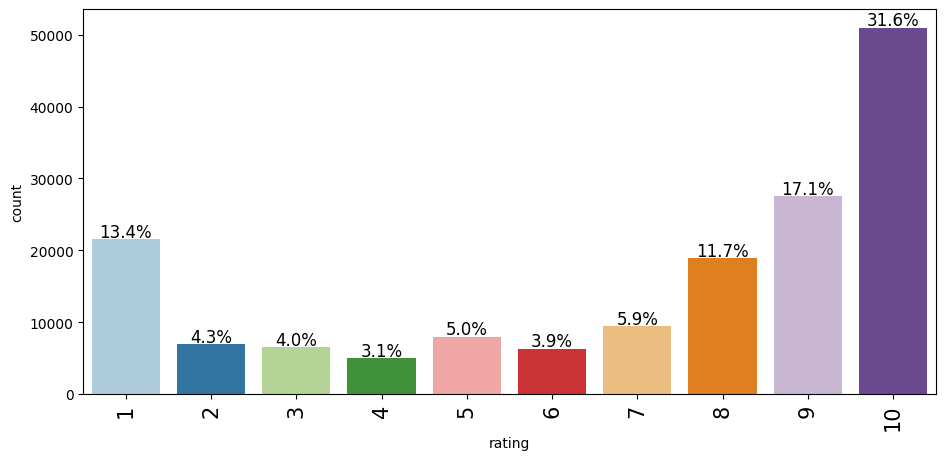

In [26]:
labeled_barplot(train_data, 'rating', perc = True, n = None)

**Observations:**
- xxx

------
### **Visualize the distribution of the top 10 medical conditions**
-----

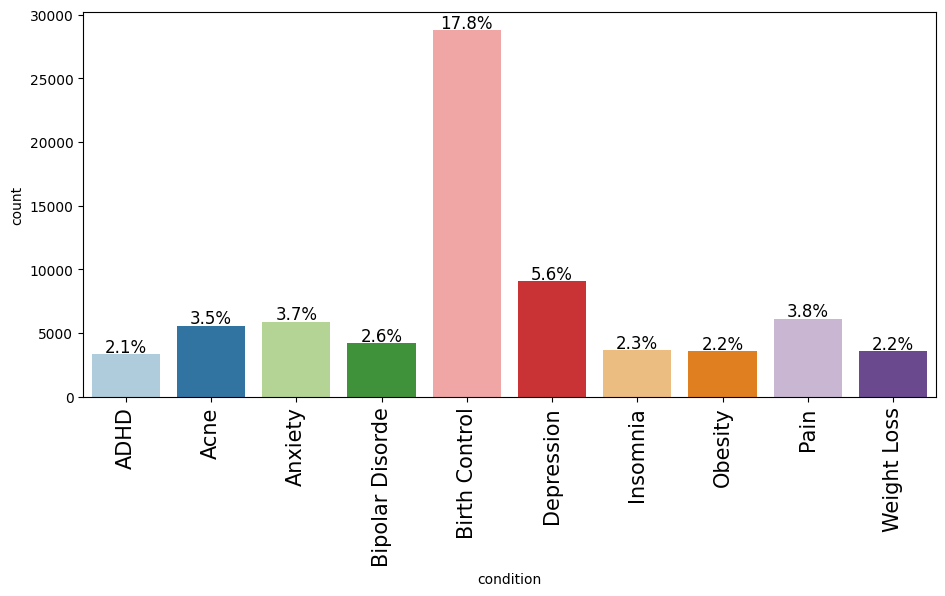

In [27]:
labeled_barplot(train_data, 'condition', perc = True, n = 10)

------
### **Visualize the distribution of the top 20 medical conditions**
-----

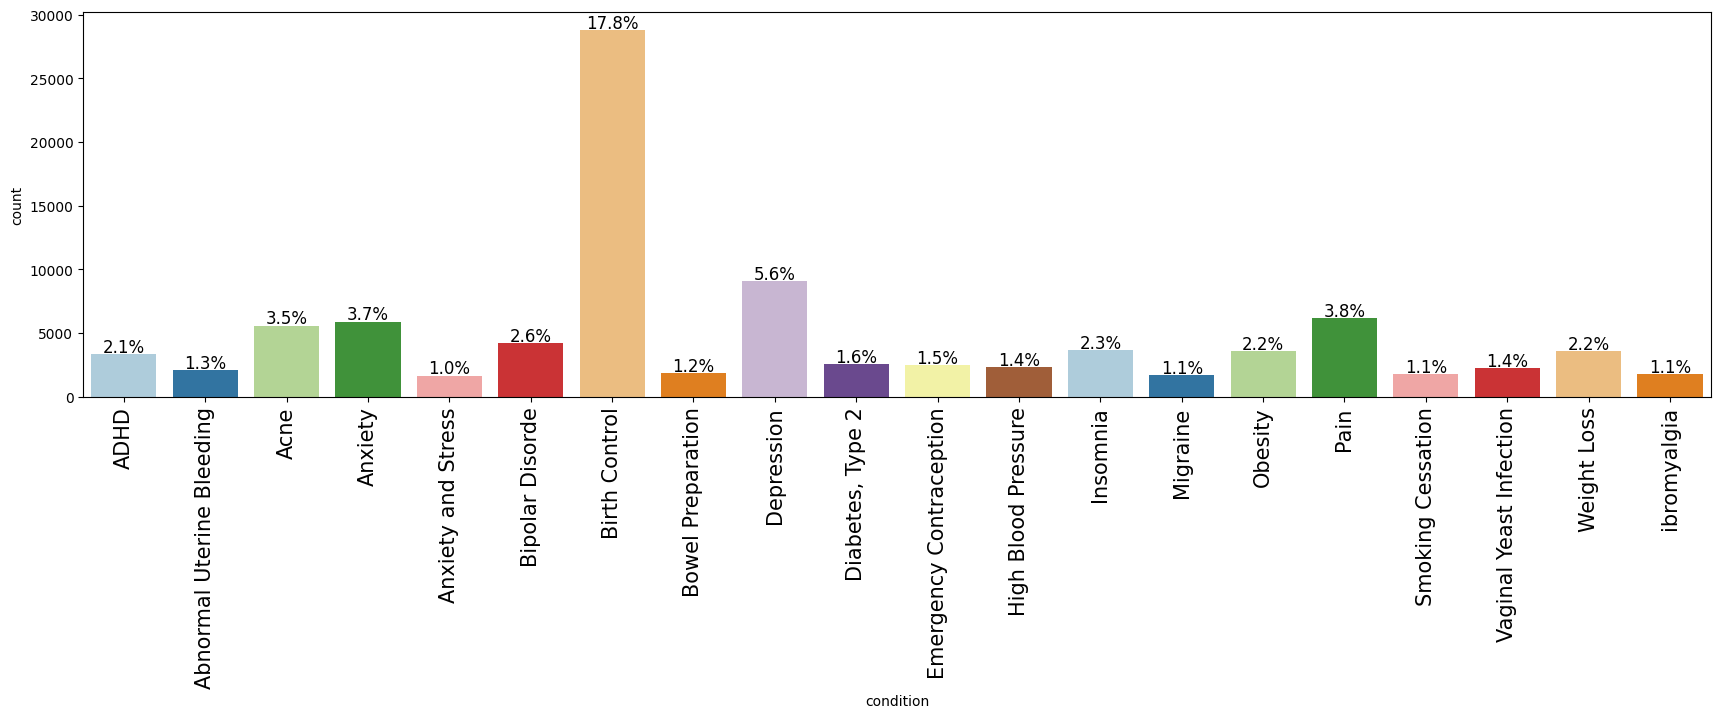

In [28]:
labeled_barplot(train_data, 'condition', perc = True, n = 20)

------
### **Visualize the distribution of the top 20 drug names**
-----

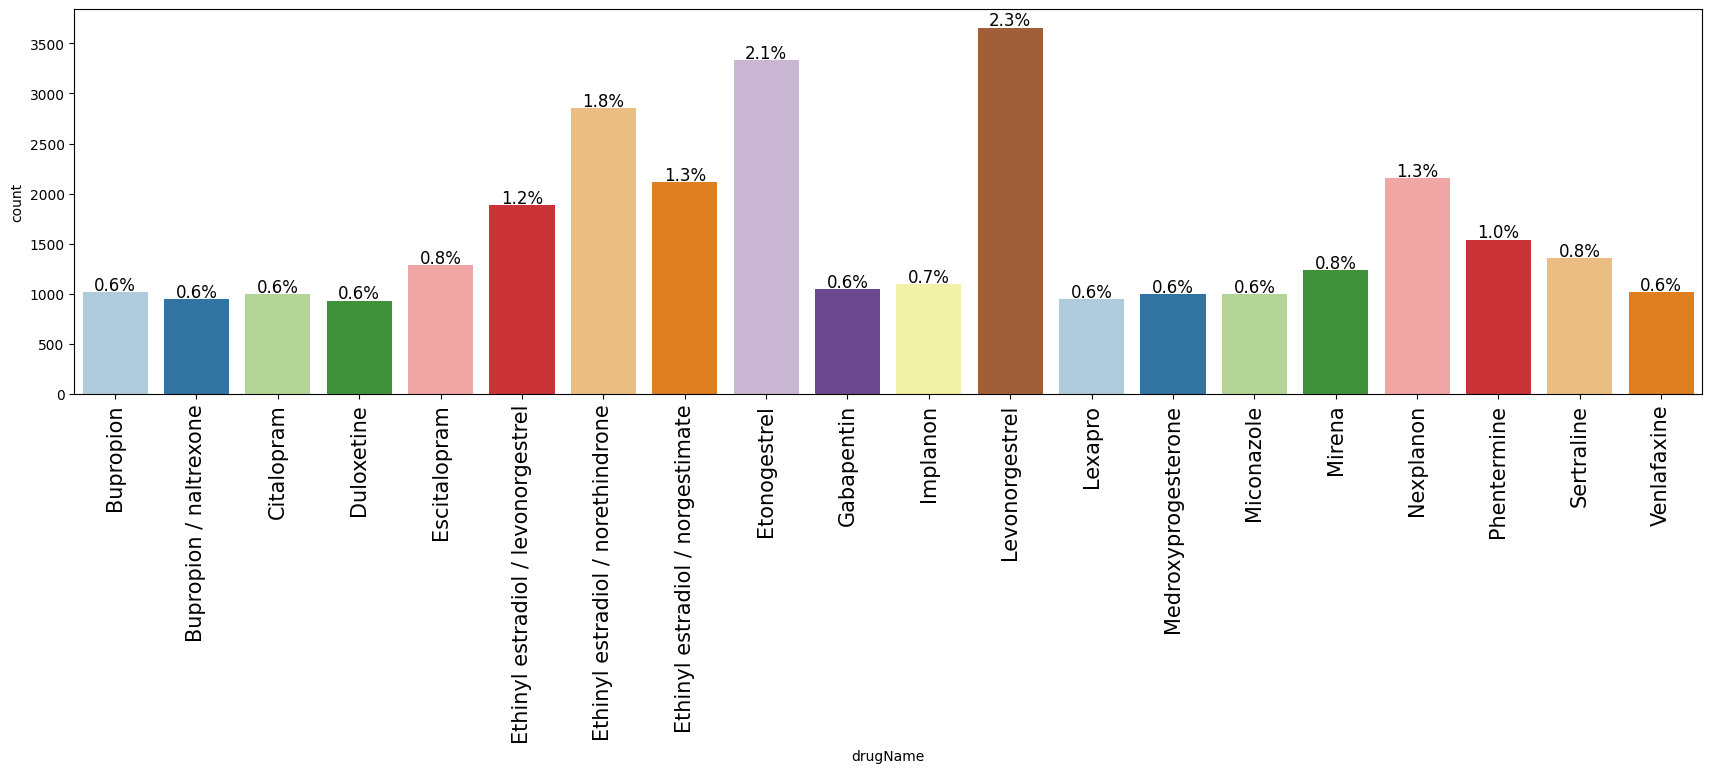

In [29]:
labeled_barplot(train_data, 'drugName', perc = True, n = 20)

----------
### **Bivariate Analysis**
----------

Text(0, 0.5, 'Count')

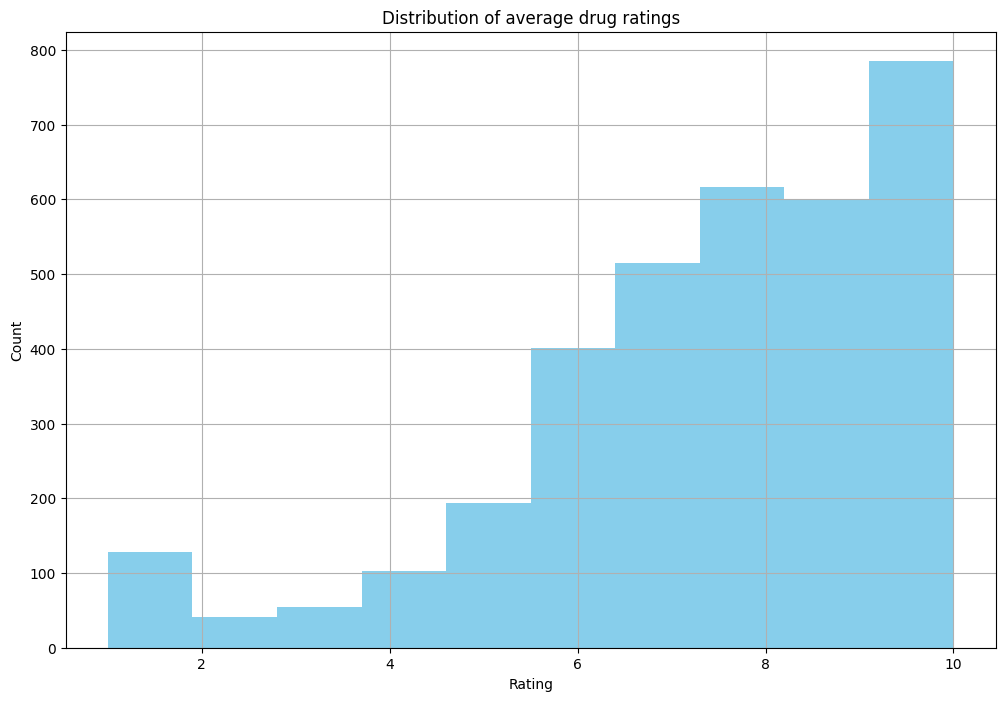

In [30]:
rating_avgs = (train_data['rating'].groupby(train_data['drugName']).mean())
rating_avgs.hist(color='skyblue')
plt.title('Distribution of average drug ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

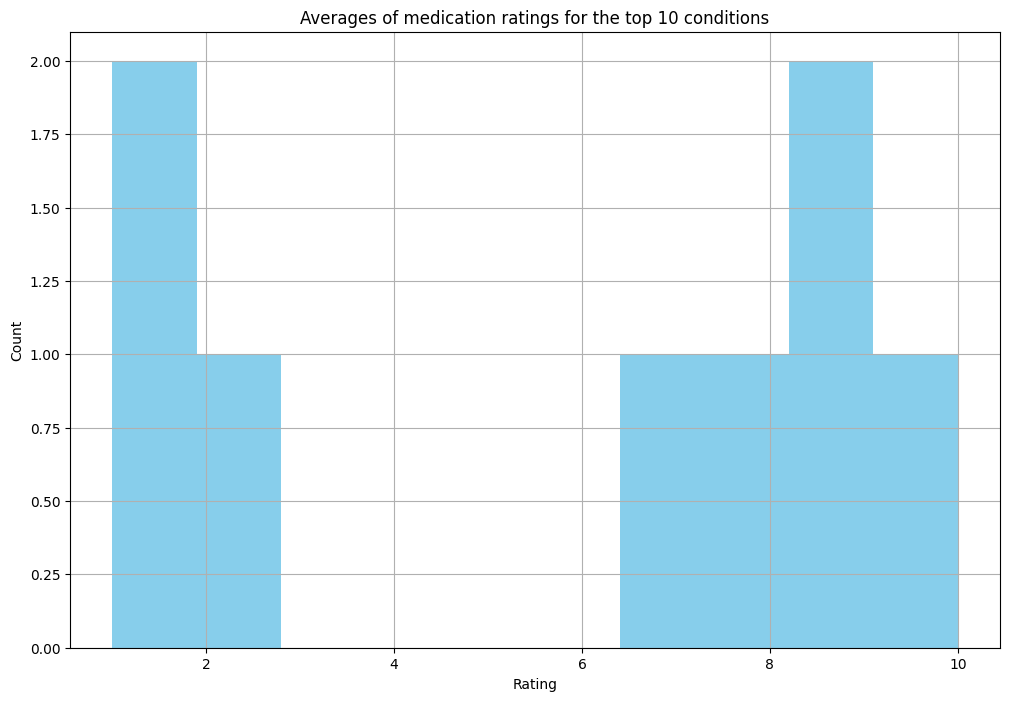

In [31]:
rating_avgs = (train_data['rating'].groupby(train_data.condition[:10]).mean())
rating_avgs.hist(color='skyblue')
plt.title('Averages of medication ratings for the top 10 conditions')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

-----
### **Usefulness vs Rating**
-----

([<matplotlib.axis.XTick at 0x2913eb310>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

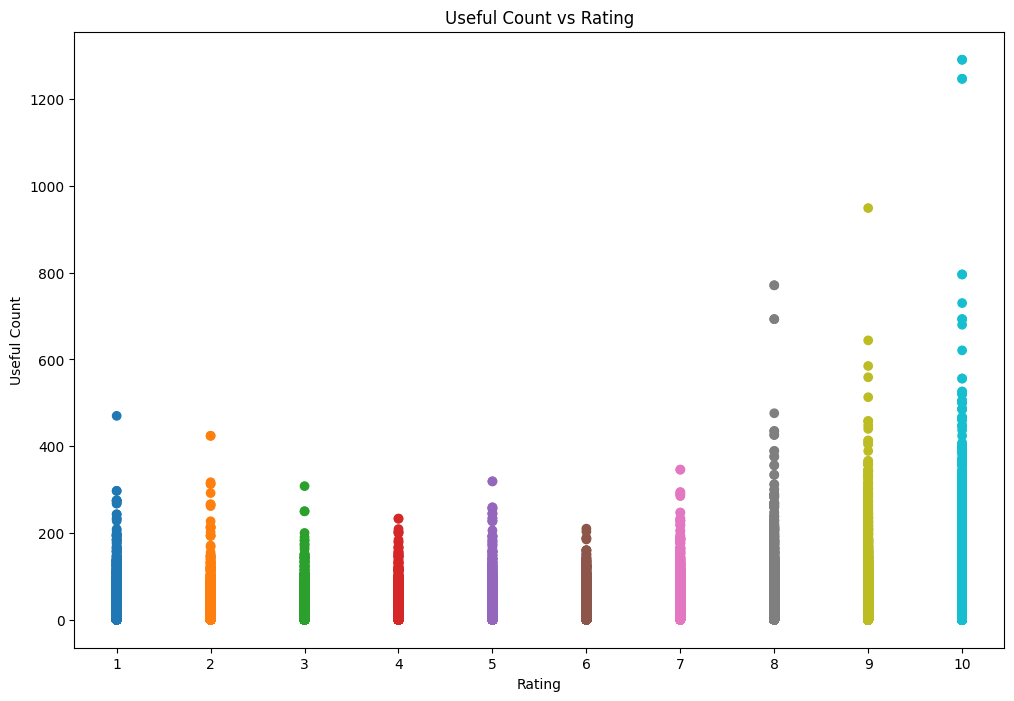

In [32]:
# Is rating correlated with usefulness of the review?
plt.scatter(train_data.rating, train_data.usefulCount, c=train_data.rating.values, cmap='tab10')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1, 11)])

In [30]:
# Create a list (cast into an array) containing the average usefulness for given ratings

use_ls = []

for i in range(1, 11):
    use_ls.append([i, np.sum(train_data[train_data.rating == i].usefulCount) / np.sum([train_data.rating == i])])
    
use_arr = np.asarray(use_ls)

([<matplotlib.axis.XTick at 0x286075ff0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

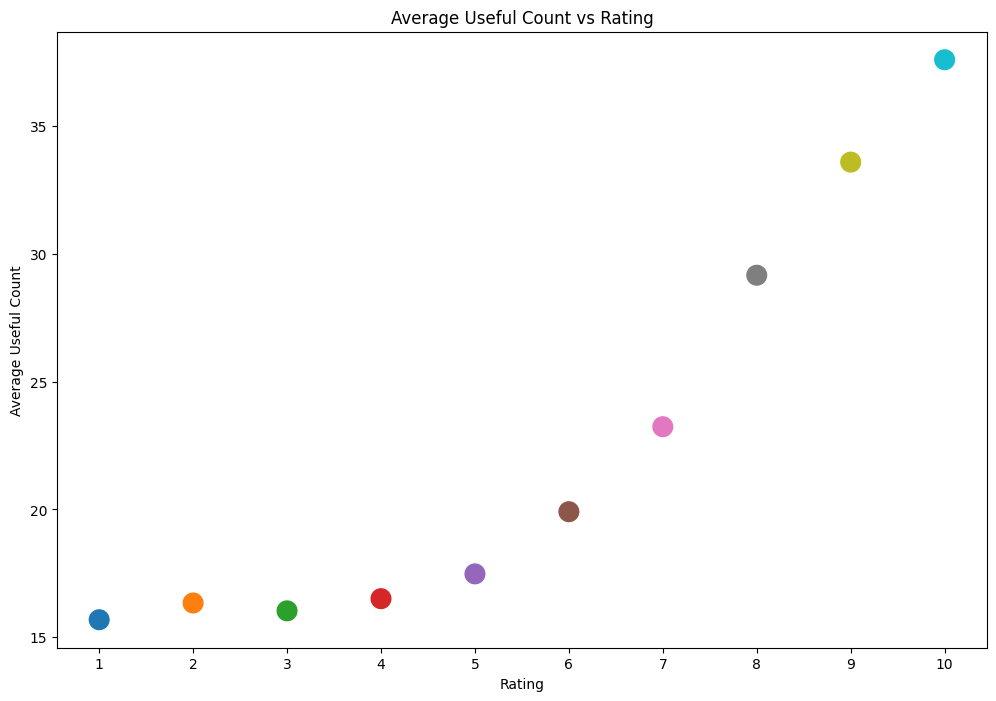

In [31]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 11)])

-------
### **Sort most useful reviews**
------

In [33]:
# Sort train dataframe from most to least useful
useful_train = train_data.sort_values(by='usefulCount', ascending=False)
useful_train.iloc[:10]

,drugName,condition,review,rating,date,usefulCount
6716,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,2008-07-31,1291
33552,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,2008-07-31,1291
21708,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,2009-04-01,1247
4249,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,2009-04-01,1247
146145,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,2008-08-05,949
58608,Phentermine,Weight Loss,"""I have used this pill off and on for the past...",10,2008-10-19,796
16889,Adipex-P,Weight Loss,"""I have used this pill off and on for the past...",10,2008-10-19,796
2039,Citalopram,Depression,"""I responded after one week. The side effects ...",8,2008-03-25,771
152838,Celexa,Depression,"""I responded after one week. The side effects ...",8,2008-03-25,771
5218,Implanon,Birth Control,"""I was very nervous about trying Implanon afte...",10,2010-07-19,730


In [34]:
# Print top 10 most useful reviews
for i in useful_train.review.iloc[:3]:
    print(i, '\n')

"I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill." 

"I remember reading people&#039;s

In [35]:
# Print 10 of the least useful reviews
for i in useful_train.review.iloc[-3:]:
    print(i, '\n')

"I received Implanon in May of 2008. I am due to have it removed in 6 months however, for the past year I have experienced decrease in sex drive, weight gain of 30lbs and also mood swings. My periods have been very scheduled and fairly regular which was great until 4-5 months ago when I missed a period then was on time the following 2 months. Last month I started a week early and it was unusually light, this month I started 2 1/2 weeks early and it has been off and on spotting for the past 5 days. I did call the helpline when I missed my period. They did not seem to concerned and I have not been able to find ANYwhere the birth rates on this specific birth control! I loved it until a year ago so the first half of my experience was great the last half no." 

"The only warning my gyno gave me was that I would be spotting for about 15 days after having the IUD inserted, which was a damn lie.  I spotted for a whole four weeks after the procedure.  My uterus chilled for two weeks before I st

In [36]:
sid = SentimentIntensityAnalyzer()

In [37]:
# Create list (cast to array) of compound polarity sentiment scores for reviews

sentiments = []

for i in train_data.review:
    sentiments.append(sid.polarity_scores(i).get('compound'))
    
sentiments = np.asarray(sentiments)

In [38]:
sentiments

array([-0.296 ,  0.8603,  0.7962, ..., -0.743 ,  0.6197,  0.6124])

In [39]:
useful_train['sentiment'] = pd.Series(data=sentiments)

In [40]:
useful_train = useful_train.reset_index(drop=True)

In [41]:
useful_train.head()

,drugName,condition,review,rating,date,usefulCount,sentiment
0,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,2008-07-31,1291,0.9772
1,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,2008-07-31,1291,0.9772
2,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,2009-04-01,1247,0.7739
3,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,2009-04-01,1247,0.7739
4,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,2008-08-05,949,-0.6815


Text(0, 0.5, 'Count')

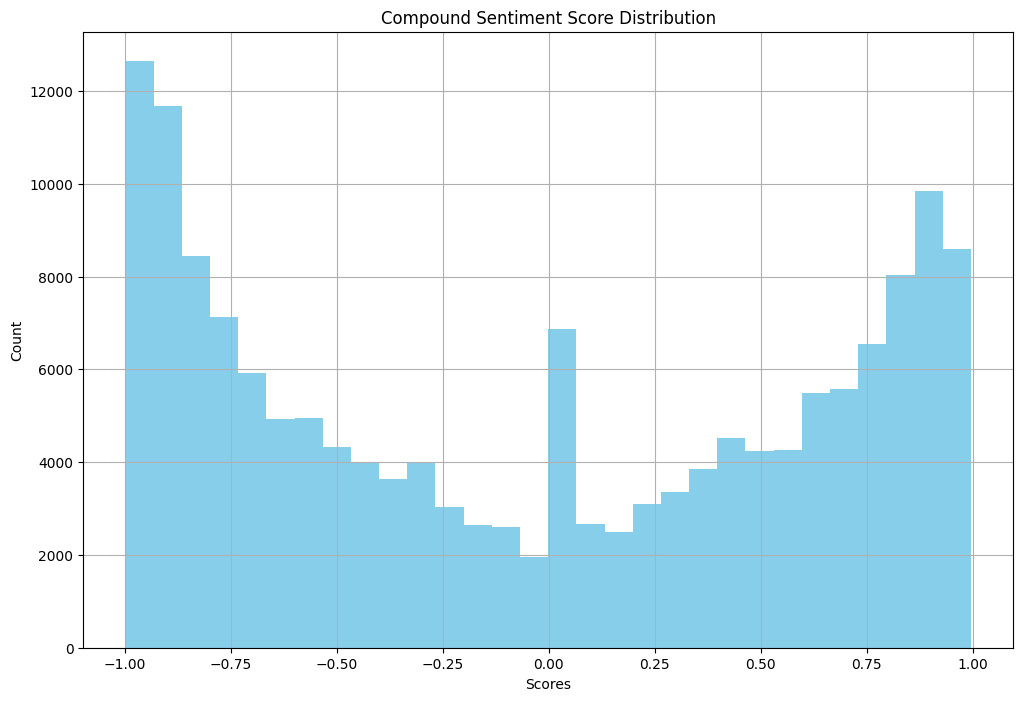

In [42]:
useful_train.sentiment.hist(color='skyblue', bins=30)
plt.title('Compound Sentiment Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Count')

(0.0, 200.0)

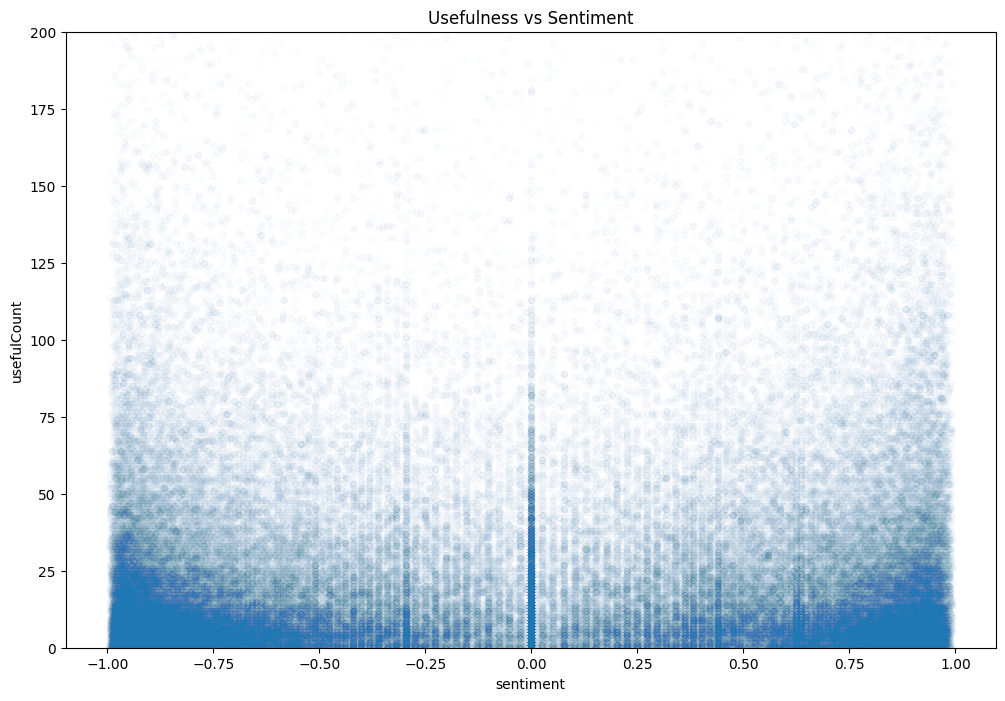

In [43]:
useful_train.plot(x='sentiment', y='usefulCount', kind='scatter', alpha=0.01)
plt.title('Usefulness vs Sentiment')
plt.ylim(0, 200)

In [45]:
# Create a list of all drugs and their average ratings, cast to dataframe

rate_ls = []

for i in train_data.drugName.unique():
    
    # Only consider drugs that have at least 10 ratings
    if np.sum(train_data.drugName == i) >= 10:
        rate_ls.append((i, np.sum(train_data[train_data.drugName == i].rating) / np.sum(train_data.drugName == i)))
    
avg_rate = pd.DataFrame(rate_ls)

In [46]:
# Sort drugs by their ratings, look at top 10 best and worst rated drugs

avg_rate = avg_rate.sort_values(by=[1], ascending=False).reset_index(drop=True)

In [47]:
avg_rate[:10]

,0,1
0,Zutripro,10.000000
1,Chlorpheniramine / hydrocodone / pseudoephedrine,10.000000
2,Silver sulfadiazine,9.972222
3,Drixoral Cold and Allergy,9.948718
4,Dexbrompheniramine / pseudoephedrine,9.947368
5,Emend,9.900000
6,Aprepitant,9.900000
7,Tegaserod,9.812500
8,Zelnorm,9.687500
9,Cyanocobalamin,9.666667


In [48]:
avg_rate[-10:]

,0,1
1371,Prevnar 13,3.363636
1372,Fosamax,3.166667
1373,Blisovi 24 Fe,3.088889
1374,Opdivo,3.083333
1375,Miconazole,3.033000
1376,Monistat 7,3.032258
1377,Alendronate,2.954545
1378,Yuvafem,2.318182
1379,Monistat 1-Day or Night Combination Pack,1.416667
1380,ProAir RespiClick,1.193548


------
### **Find the highest and lowest rated drugs for each condition**
------

In [49]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in train_data.condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in train_data[train_data.condition == i].drugName.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(train_data.drugName == j) >= 10:
            temp_ls.append((j, np.sum(train_data[train_data.drugName == j].rating) / np.sum(train_data.drugName == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

------
### **Index the dictionary by a specific condition to see the top rated drugs for that condition**
-----

In [50]:
help_dict['Birth Control'].iloc[:10]

,drug,average_rating
0,Plan B,8.674917
1,Lybrel,7.600000
2,Ortho Evra,7.470320
3,Kyleena,7.463576
4,Levonorgestrel,7.391031
5,Ortho-Cept,7.250000
6,Skyla,7.246359
7,Copper,7.235197
8,Beyaz,7.042553
9,Dienogest / estradiol,6.875000


In [51]:
help_dict['Depression'].iloc[:10]

,drug,average_rating
0,Desipramine,9.285714
1,Xanax XR,8.947368
2,Alprazolam,8.933144
3,Xanax,8.881579
4,Parnate,8.763158
5,St. john's wort,8.739130
6,Nefazodone,8.727273
7,Methylin ER,8.700000
8,Clomipramine,8.680000
9,Phenelzine,8.666667


In [52]:
help_dict['Acne'].iloc[:10]

,drug,average_rating
0,Benzoyl peroxide,8.869565
1,Benzaclin,8.865385
2,Milk of Magnesia,8.833333
3,Benzoyl peroxide / erythromycin,8.750000
4,Magnesium hydroxide,8.710000
5,Accutane,8.427273
6,Isotretinoin,8.392453
7,Onexton,8.357143
8,Retin-A,8.342857
9,Atralin,8.250000


-----
### **Worst rated drugs**
-----

In [53]:
help_dict['Birth Control'].iloc[-10:]

,drug,average_rating
97,Medroxyprogesterone,4.756784
98,Taytulla,4.687500
99,Depo-Provera,4.617914
100,Gildess Fe 1 / 20,4.594286
101,Camila,4.225806
102,Ashlyna,4.133333
103,Tri-Lo-Sprintec,4.037736
104,Estarylla,3.707317
105,Blisovi Fe 1 / 20,3.440000
106,Blisovi 24 Fe,3.088889


In [54]:
help_dict['Depression'].iloc[-10:]

,drug,average_rating
76,Paliperidone,6.298077
77,Effexor,6.230189
78,Risperidone,6.200000
79,Vilazodone,6.187354
80,Trintellix,6.098734
81,Vortioxetine,6.069034
82,Strattera,5.520000
83,Atomoxetine,5.436893
84,Levomilnacipran,5.168317
85,Fetzima,5.151163


In [55]:
help_dict['Acne'].iloc[-10:]

,drug,average_rating
64,Ethinyl estradiol / norethindrone,5.591930
65,Sulfamethoxazole / trimethoprim,5.557875
66,Junel Fe 1 / 20,5.404545
67,Loryna,5.162791
68,Tri-Previfem,4.984615
69,Junel Fe 1.5 / 30,4.961538
70,Gildess Fe 1.5 / 30,4.791667
71,SMZ-TMP DS,4.666667
72,Gildess Fe 1 / 20,4.594286
73,Estarylla,3.707317


-------
# **ML Workflow**
-------

## **Random Forest**

In [56]:
# Creates TF-IDF vectorizer and transforms the corpus

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_data.review)

# transforms test reviews to above vectorized format

X_test = vectorizer.transform(test_data.review)

In [57]:
# Create a column with binary rating indicating the polarity of a review

train_data['binary_rating'] = train_data['rating'] > 5

y_train_rating = train_data.binary_rating
clf = MultinomialNB().fit(X_train, y_train_rating)

# Evaluates model on test set

test_data['binary_rating'] = test_data.rating > 5
y_test_rating = test_data.binary_rating
pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Accuracy: 0.7527247703009337
Confusion Matrix
[[ 3233   321]
 [12974 37238]]


In [58]:
# Trains random forest classifier

start = time.time()
rfc_rating = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10000, min_samples_split = 0.001)
rfc_rating.fit(X_train, y_train_rating)
end = time.time()
print("Training time: %s" % str(end-start))

# Evaluates model on test set

pred = rfc_rating.predict(X_test)

print("Accuracy: %s" % str(rfc_rating.score(X_test, y_test_rating)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Training time: 61.214624881744385
Accuracy: 0.8310084439980657
Confusion Matrix
[[ 7252   131]
 [ 8955 37428]]


-----
## **Classification via Keras**
-----

In [59]:
b = "'@#$%^()&*;!.-"
X_train = np.array(train_data['review'])
X_test = np.array(test_data['review'])

def clean(X):
    for index, review in enumerate(X):
        for char in b:
            X[index] = X[index].replace(char, "")
    return(X)

X_train = clean(X_train)
X_test = clean(X_test)
print(X_train[:2])

['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'
 '"My son is halfway through his fourth week of Intuniv We became concerned when he began this last week, when he started taking the highest dose he will be on For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation very unusual for him I called his doctor on Monday morning and she said to stick it out a few days See how he did at school, and with getting up in the morning The last two days have been problem free He is MUCH more agreeable than ever He is less emotional a good thing, less cranky He is remembering all the things he should Overall his behavior is better \r\nWe have tried many different medications and so far this is the most effective"']


## **Load libraries**

In [65]:
!pip3 install tensorflow.compat.v2

ERROR: Could not find a version that satisfies the requirement tensorflow.compat.v2 (from versions: none)
ERROR: No matching distribution found for tensorflow.compat.v2


In [64]:
import tensorflow.compat.v2 as tf
from keras import backend
from keras.dtensor import layout_map as layout_map_lib

ModuleNotFoundError: No module named 'tensorflow'

In [60]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from keras.utils import to_categorical
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'),lowercase=True, max_features=5000)
#vectorizer = TfidfVectorizer(binary=True, stop_words=stopwords.words('english'), lowercase=True, max_features=5000)
test_train = np.concatenate([X_train, X_test])
print(test_train.shape)
X_onehot = vectorizer.fit_transform(test_train)
stop_words = vectorizer.get_stop_words()
print(type(X_onehot))

--------
## **Data Preprocessing**
-----------

## **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.** 

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2022 - data.Store_Establishment_Year

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [ ]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [ ]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

In [ ]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [ ]:
data["Product_Type_Category"] = pd.Series(change1)

In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,13,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,23,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,35,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,35,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,24,Non Perishables


-----------
## **Characterize Outliers**

-----------

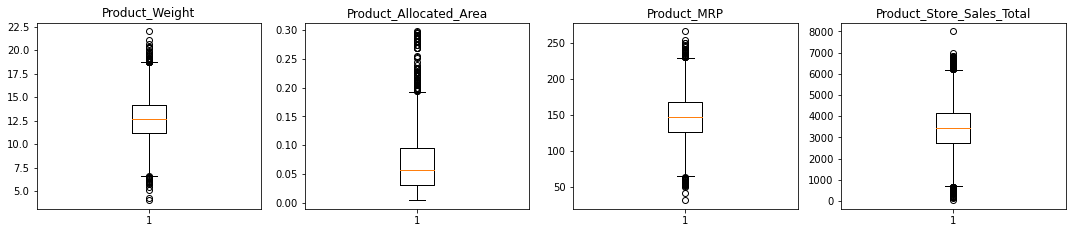

In [ ]:

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- xxx

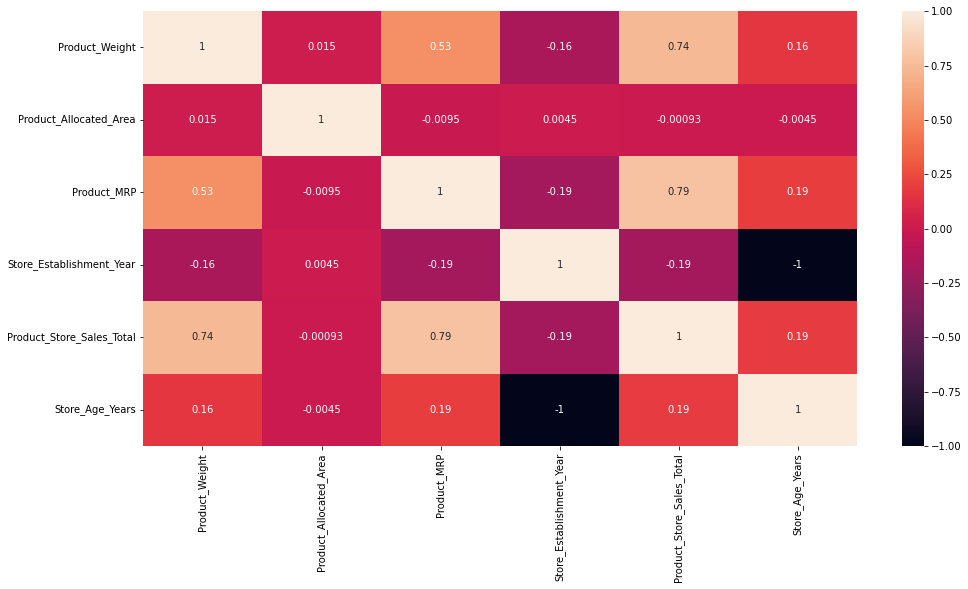

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:**
- xxxx

----------
## **Data Preparation for modeling**
------------

-------
## **Objectives:**
- What is the target variable?
- Which categorical features need to be encoded?
- Which columns can be dropped?
- Data needs to be split out to training and testing data subsets
--------

In [ ]:
# Drop these columns XXXXX XXXXX

data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [ ]:
# Generate dummy variables

data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# Separating features and the target variable

X = data.drop(["Product_Store_Sales_Total"], axis = 1)
y = data["Product_Store_Sales_Total"]

In [ ]:
X = sm.add_constant(X)

In [ ]:
# Split the data into train and test sets in 70:30 ratio (or 80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

----------
## **Check for Multicollinearity**
----------

## **Objectives:**

- Use the Variance Inflation Factor (VIF), to characterize multicollinearity in the data.
- Those features with a VIF score > 5 will be dropped / processed till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Method to check VIF

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculate VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4                     Store_Age_Years       inf
5      Product_Sugar_Content_No Sugar       inf
6       Product_Sugar_Content_Regular  1.088506
7                   Store_Size_Medium       inf
8                    Store_Size_Small       inf
9     Store_Location_City_Type_Tier 2       inf
10    Store_Location_City_Type_Tier 3       inf
11               Store_Type_Food Mart       inf
12       Store_Type_Supermarket Type1       inf
13       Store_Type_Supermarket Type2       inf
14                 Product_Id_char_FD  2.774371
15                 Product_Id_char_NC       inf
16  Product_Type_Category_Perishables  1.217690


In [ ]:
print(checking_vif(X_train))

**Observations:**
- xxxx

### **Drop columns**

In [ ]:
X_train = X_train.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

--------
## **Check the VIF again**
---------

In [ ]:
print(checking_vif(X_train))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4      Product_Sugar_Content_No Sugar       inf
5       Product_Sugar_Content_Regular  1.088506
6                   Store_Size_Medium       inf
7                    Store_Size_Small       inf
8     Store_Location_City_Type_Tier 2       inf
9     Store_Location_City_Type_Tier 3       inf
10               Store_Type_Food Mart       inf
11       Store_Type_Supermarket Type1       inf
12       Store_Type_Supermarket Type2       inf
13                 Product_Id_char_FD  2.774371
14                 Product_Id_char_NC       inf
15  Product_Type_Category_Perishables  1.217690


---------
# **Building Models**
---------

-----------
## **Method for generating Performance Metrics**
----------

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data

def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction

    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

-----
## **Fit the FIRST model**
------

In [82]:
model1 = sm.OLS(y_train, X_train).fit()

# Show the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     2860.
Date:                       Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                               16:19:05   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6123   BIC:                         9.236e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               176.6077     42.659      4.140      0.000      92.982     260.234
Product_Weight                      135.0943      3.436     39.318      0.000     128.359     141.830
Product_Allocated_Area             -139.5679    118.876     -1.174      0.240    -372.608      93.472
Product_MRP                          12.8696      0.254     50.702      0.000      12.372      13.367
Product_Sugar_Content_No Sugar       16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Sugar_Content_Regular        30.8608     13.284      2.323      0.020       4.819      56.902
Store_Size_Medium                   394.3947     26.547     14.856      0.000     342.353     446.436
Store_Size_Small                   -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Location_City_Type_Tier 2    -308.1516      8.855    -34.801      0.000    -325.510    -290.794
Store_Location_City_Type_Tier 3    -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Food Mart               -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Supermarket Type1        165.3861     17.762      9.311      0.000     130.566     200.206
Store_Type_Supermarket Type2       -473.5378     17.176    -27.570      0.000    -507.208    -439.867
Product_Id_char_FD                    0.3932     21.936      0.018      0.986     -42.609      43.396
Product_Id_char_NC                   16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Type_Category_Perishables     7.7111     13.233      0.583      0.560     -18.231      33.653
==============================================================================
Omnibus:                     1745.262   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46497.082
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.399   Cond. No.                     8.67e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

-----
## **Characterize first model performance using the method created above**
------

In [83]:

model_pref(model1, X_train, X_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


**Observations:**
- xxxx

---------
##  **Drop insignificant variables (variables with p-value > 0.05).**
--------

In [84]:
X_train1 = X_train.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

In [85]:
X_test1 = X_test.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

-----
## **Fit the SECOND model**
------

In [86]:
model2 = sm.OLS(y_train, X_train1).fit()

# Show the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     3576.
Date:                       Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                               16:19:05   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.228e+04
Df Residuals:                           6125   BIC:                         9.234e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             179.0666     40.949      4.373      0.000      98.793     259.340
Product_Weight                    135.0918      3.435     39.323      0.000     128.357     141.827
Product_Allocated_Area           -140.3752    118.852     -1.181      0.238    -373.367      92.616
Product_MRP                        12.8703      0.254     50.727      0.000      12.373      13.368
Product_Sugar_Content_No Sugar     14.1944      7.933      1.789      0.074      -1.358      29.747
Product_Sugar_Content_Regular      30.7219     13.272      2.315      0.021       4.704      56.740
Store_Size_Medium                 395.6741     25.835     15.316      0.000     345.029     446.319
Store_Size_Small                 -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Location_City_Type_Tier 2  -307.8490      8.636    -35.648      0.000    -324.778    -290.920
Store_Location_City_Type_Tier 3  -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Type_Food Mart             -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Type_Supermarket Type1      166.1521     17.353      9.575      0.000     132.135     200.169
Store_Type_Supermarket Type2     -474.0011     17.074    -27.762      0.000    -507.472    -440.530
Product_Id_char_NC                 14.1944      7.933      1.789      0.074      -1.358      29.747
==============================================================================
Omnibus:                     1744.629   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46526.548
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.403   Cond. No.                     1.53e+35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.93e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

-----
## **Check SECOND model performance metrics**
------

In [87]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

    Data        RMSE         MAE        r2
0  Train  446.681336  262.125308  0.785911
1   Test  446.780252  266.790089  0.790113


**Observations:**
- xxxx

-----
### **Check list to see if the linear regression assumptions have been met**
-------


1) **Mean of residuals = 0**
2) **No Heteroscedasticity**
3) **Linearity of variables**
4) **Normality of error terms**

## **1) Check for mean residuals on the SECOND model**

In [88]:
residuals = model2.resid

np.mean(residuals)

-4.896207049550968e-12

**Observations:**

- Is it at or very near zero?

--------
### **2) Check for Homoscedasticity**
---------

- **Homoscedasticity** - Are the residuals **symmetrically distributed across the regression line**? If yes =  data is homoscedastic.

- **Heteroscedasticity** - Are the residuals are **NOT** symmetrically distributed across the regression line? If yes =  data is heteroscedastic. (residuals may form a funnel shape or any other non-symmetrical shape)

- Use the `**Goldfeldquandt Test**` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [89]:
# Load relevant libraries

from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [90]:

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train1)

lzip(name, test)

[('F statistic', 0.9832189770563923), ('p-value', 0.6800664494252275)]

**Observations:**

- REPLACE THIS WITH ACTUAL OBS - Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

----------
## **3) Linearity of variables**
-----------

- Predictor variables must have a **linear** relationship to the dependent variable.

- To test, plot residuals and fitted values on a plot
    - Look for strong patterns in the residuals
    - Residuals should be **randomly and uniformly scattered on the x-axis**

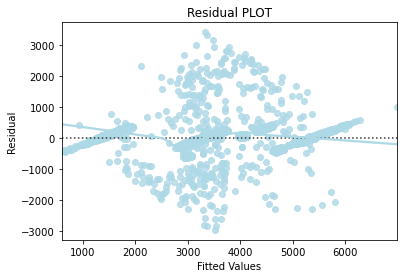

In [91]:
# Predicted values

fitted = model2.fittedvalues

# sns.set_style("whitegrid")

sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

- REPLACE WITH ACTUAL OBS There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

---------
## **4) Check for normality of error terms**
---------

- **Residuals should be normally distributed**.

<AxesSubplot:ylabel='Count'>

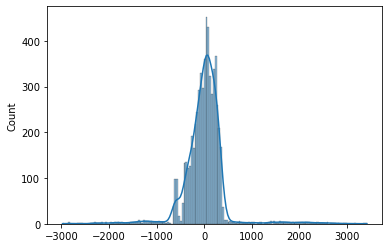

In [92]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

## **Create the q-q plot of residuals**

In [ ]:
# Import relevant libraries

import pylab

import scipy.stats as stats

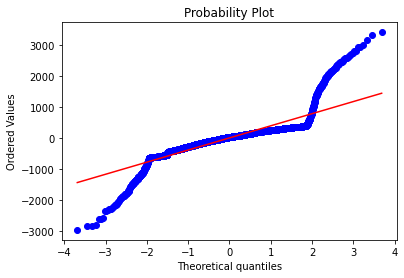

In [93]:
stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**

- REPLACE WITH ACTUAL OBS From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test dataset.

-------
# **Cross-Validation**
-------

- **Cross-validation will improve the model** 
- **Model is valuated using different metrics**

------
## **Create a Regression Model**
------

### **Import relevant assets**

In [ ]:
from sklearn.model_selection import cross_val_score

In [95]:
# Build the regression model and cross-validate

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.823 (+/- 0.045)
Mean Squared Error: 200712.689 (+/- 64085.512)


**Observation:**
- REPLACE WITH ACTUAL OBS After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

---------
## **Conclusions (Actionable Insights and Business Recommendations)**
--------

# **REPLACE WITH ACTUAL OBSERVATIONS**

- We can use this forecasting model to predict the total sales that will be done by SuperKart in the next quarter.

- The model explains around 79% of the variation in the data.

- **OUT004** - OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. SuperKart can look to increase the size of this store from medium to high. They can also look to set up stores in this type of city having comparable socio-economic conditions in order to expand their business and reach.

- **OUT002** - OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. SuperKart can look to upgrade its size or target similar cities for business expansion.

- **OUT001** - OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing upto the mark. SuperKart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more customers.

- **OUT003** - Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be targetted.

- Daily needs like fruits and vegetables and snack foods are the biggest contributors to the revenue across all the stores. So SuperKart should look to maintain the inventory of these products properly and ensure that these products never face a shortage.

**Additional information that can be collected to gain better insights -**

- Customers' details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies according to that.

- The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their inventory accordingly.